__Ejercicio 1:__ Crear la libreria herramientas dentro de su carpeta de tareas, en su repositorio. Dentro deberán poner los métodos de Newton que construyeron, los métodos de integración, Euler independiente de dimensión (implícito y explícito)y Runge-Kutta independiente de dimensión. Recuerden que las rutinas deben funcionar solo con sus argumentos, no debe haber variables globales, todo lo que necesite la función para trabajar debe ser un argumento o una variable definida internamente.
* Las rutinas tienen que llevar su documentación.
* Crearán el notebook de la __tarea 15 (para el Martes 17)__ y en el llamarán a su libreria con el comando `import`.
* Deberán demostrar que sus rutinas funcionan bien, no se necesitan tests extensos, basta con que muestren que si _corren_ las rutinas.

In [1]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export metodo_newton

"""documentación del método de Newton"""
function metodo_newton(f,g,x0,tol) #es la funcion para calcular el método de newton
        J=f(x0)  #evaluo si x0 no es la raiz
    nuevaf=abs(J) #Y llamaré al primer error, lo que se separe f(x0) del 0.
        while nuevaf>tol #mientras el error sea mayor a la tolerancia dada, entrará al loop.
        F=f(x0) #evaluo x0 en f
        G=g(x0) #evaluo x0 en g
        x1=x0-(F/G) #x1 es la aproximación de la raiz a partir de x0
        J=f(x1)
        nuevaf=abs(J) #recalculo el error, ahora apartir de la distancia entra las aproximaciones x1 y x0 de la raiz
        x0=x1 #redefino x0 ahora como x1 por si necesito entrar al loop
     #   println(x0) #imprime todas las x1 calculadas
    end
x0 #devuelve x0
end

export Riemann

function Riemann(f,a,b,N)
    x=linspace(a,b,N)
    A=0
    for i in 2:N
        dx=x[i]-x[i-1]
        F=f(x[i-1])
        A=(F*dx)+A
    end
    return A
end

export trapecios

function trapecios(f,a,b,N)
    x=linspace(a,b,N)
    A=0
    for i in 2:N
        dx=x[i]-x[i-1]
        F1=f(x[i-1])
        F2=f(x[i])
        F=((F1+F2)/2)
        A=(F*dx)+A
    end
    return A
end

export Simpson

function Simpson(f,a,b)
    m=(b-a)/2
    A=(m/3)*(f(a)+f(b)+(4*f(m)))
    return A
    end

export Runge #Es el runge de la tarea 13 inciso 1
using PyPlot
function Runge(f,alfa, t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X = []
    t = t0
    x = alfa
    while t<=N
        push!(T,t)
        push!(X,x)
        k1=(f(t,x)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2))
        k4=f(t+h,x+(h*k3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
    end
    plot(T,X,color="pink") #grafica la solucion
end

export eulerMethod
using PyPlot
function eulerMethod(f,alfa,t0,h,N) #voy a implementar el metodo numerico de euler para ec. diferenciales
    T = [] #en estos arreglos vacios guardaré mis pasos de tiempo t
    W = []#aqui guardare los x obtenidos en cada iteracion
    t=t0 #es mi valor inicial de t
    w = alfa#es mi valor inicial de x
    while t<=N #si t aun no llega al valor que quiero que llegue, entra al ciclo
        push!(T,t) #guarda el valor de t en T
        push!(W,w) #guarda el valor de x en W
        t=t+h
        s=f(t,w)#la ec diferencial de primer orden está igualada a una funcion f y aca se evalua nuestro valor anterior de t y x
        w = w + h*s #recalculamos x
    end  
     plot(T,W,color="purple") #grafica la solucion
end

 export eulerImp #Es el euler implicito de la tarea 12 inciso 1
using PyPlot
function eulerImp(f,alfa,t0,h,N) #voy a implementar el metodo numerico de euler para ec. diferenciales
    T = [] #en estos arreglos vacios guardaré mis pasos de tiempo t
    W = []#aqui guardare los x obtenidos en cada iteracion
    t=t0 #es mi valor inicial de t
    w = alfa #es mi valor inicial de x
    while t<=N #si t aun no llega al valor que quiero que llegue, entra al ciclo
        push!(T,t) #guarda el valor de t en T
        push!(W,w) #guarda el valor de x en W
        t=t+h
        s=f(t,w)#la ec diferencial de primer orden está igualada a una funcion f y aca se evalua nuestro valor anterior de t y x
        w = w + h*s #recalculamos x
        
    end  
    scatter(T,W,color="green") #graficamos t vs x
end

end

herramientas

In [2]:
import herramientas.jl

In [3]:
herramientas.metodo_newton(x->x^2-2,x->2*x,1,0.001)

1.4142156862745099

In [4]:
H(x)=(3/(4-x))


H (generic function with 1 method)

In [5]:
herramientas.Riemann(H,0,2,101)

2.0719602914454724

In [6]:
herramientas.trapecios(H,0,2,101)

2.0794602914454727

In [7]:
herramientas.Simpson(H,0,2)

2.083333333333333

In [8]:
U(t,x)=-5*x

U (generic function with 1 method)

In [9]:
using PyPlot

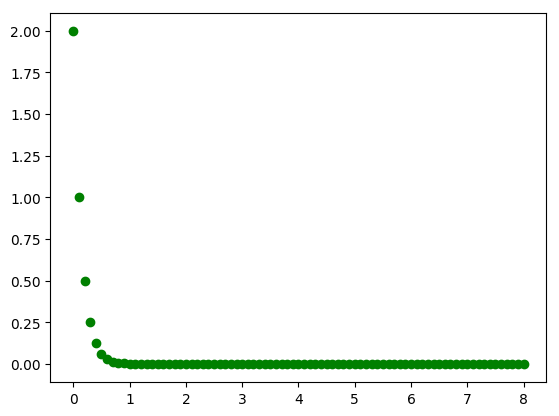

PyObject <matplotlib.collections.PathCollection object at 0x7f76c214f250>

In [10]:
herramientas.eulerImp(U,2,0,0.1,8)

In [11]:
function G(t,x)
    a=cos(0.866*t)+(1.732*sin(0.866*t))
    b=e^(t/2)
    c=(-a)/b
    return c
end

G (generic function with 1 method)

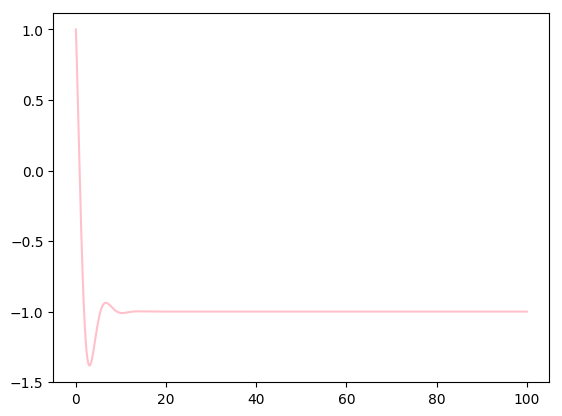

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f76c1db9450>

In [12]:
herramientas.Runge(G,1,0,0.001,100)

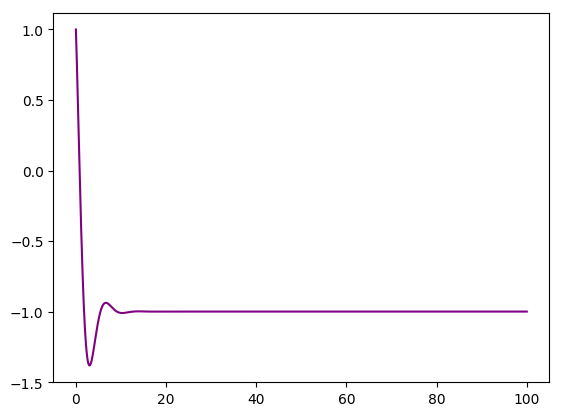

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f76c1cf3510>

In [13]:
herramientas.eulerMethod(G,1,0,0.001,100)